<a href="https://colab.research.google.com/github/HVTrieuDuong/TRI-TUE-NHAN-TAO-HCMUTE/blob/main/Khuonmat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_generator = ImageDataGenerator(rescale=1./255,
                                    validation_split=0.1,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

In [4]:
trainset='/content/drive/MyDrive/HCMUTE Cơ-điện tử/Trí tuệ nhân tạo/anhai/'

In [5]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)
     

Found 99 images belonging to 2 classes.
Found 11 images belonging to 2 classes.


In [6]:

validation_set.class_indices


{'phat': 0, 'phuc': 1}

In [7]:

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(100,100,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))

In [8]:

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_dataset,batch_size=128,epochs=50,verbose=1,validation_data=validation_set)

Epoch 1/50
1/1 [==============================] - 23s 23s/step - loss: 0.9966 - accuracy: 0.4545 - val_loss: 45.8718 - val_accuracy: 0.5455
Epoch 2/50
1/1 [==============================] - 16s 16s/step - loss: 45.8911 - accuracy: 0.5455 - val_loss: 0.6773 - val_accuracy: 0.4545
Epoch 3/50
1/1 [==============================] - 16s 16s/step - loss: 0.6889 - accuracy: 0.5051 - val_loss: 0.6991 - val_accuracy: 0.4545
Epoch 4/50
1/1 [==============================] - 16s 16s/step - loss: 0.6894 - accuracy: 0.4444 - val_loss: 0.7011 - val_accuracy: 0.5455
Epoch 5/50
1/1 [==============================] - 17s 17s/step - loss: 0.6942 - accuracy: 0.5455 - val_loss: 0.6976 - val_accuracy: 0.4545
Epoch 6/50
1/1 [==============================] - 15s 15s/step - loss: 0.7009 - accuracy: 0.4545 - val_loss: 0.6821 - val_accuracy: 0.4545
Epoch 7/50
1/1 [==============================] - 15s 15s/step - loss: 0.6789 - accuracy: 0.5051 - val_loss: 0.6902 - val_accuracy: 0.5455
Epoch 8/50
1/1 [=========

In [9]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)


Found 99 images belonging to 2 classes.
Found 11 images belonging to 2 classes.


In [10]:
model.save('monan15.hs')

In [11]:
label = ['Phat','Phuc']

1/1 [==============================] - 0s 205ms/step
Phat


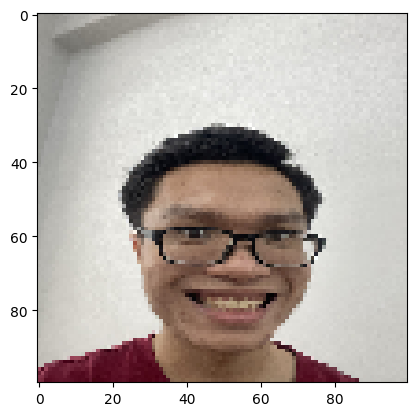

In [12]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/HCMUTE Cơ-điện tử/Phat (11).jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 142ms/step
Phuc


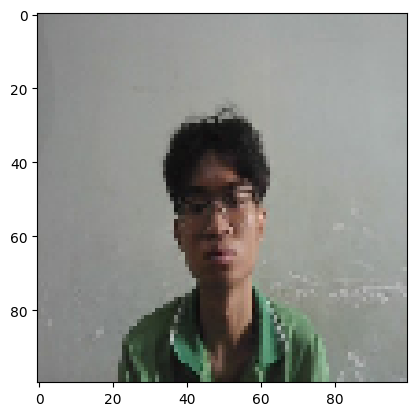

In [13]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/HCMUTE Cơ-điện tử/Phuc (26).jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])